In [1]:
import json

import matplotlib.pyplot as plt
import numpy as np

train_file = "../task_data/germeval-competition-traindev.jsonl"
test_file = "../task_data/germeval-competition-test.jsonl"

with open(train_file, 'r') as f:
    train_data = [json.loads(line) for line in f]

with open(test_file, 'r') as f:
    test_data = [json.loads(line) for line in f]

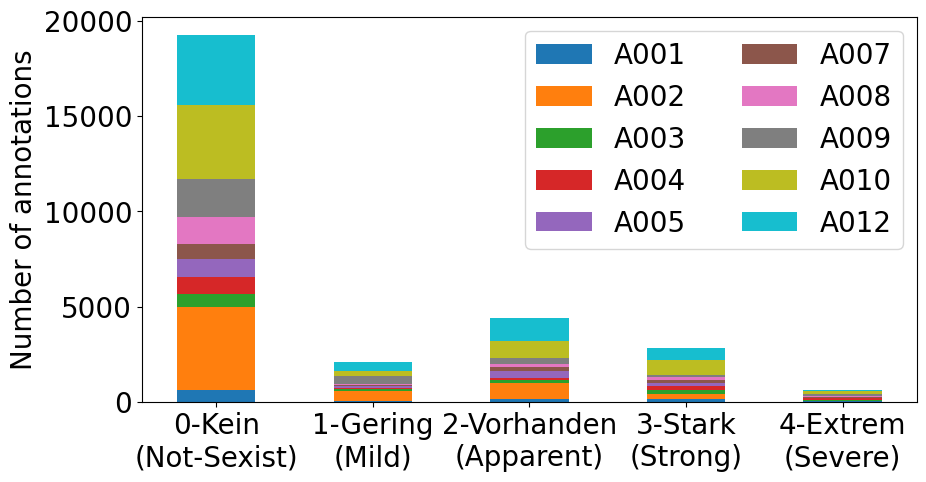

In [2]:
train_ann = [d['annotations'] for d in train_data]
test_ann = [d['annotators'] for d in test_data]

# increase font size for better readability
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(10, 5))
all_user_ann = []
users = []
for user in range(12):
    user_str = "A" + f"00{user + 1}"[-3:]
    user_train_ann = [ann['label'] for c_ann in train_ann for ann in c_ann
                      if ann['user'] == user_str]
    user_train_ann = [int(ann[0]) for ann in user_train_ann]
    if len(user_train_ann) == 0:
        continue
    all_user_ann.append(user_train_ann)
    users.append(user_str)

plt.hist(all_user_ann, label=users, bins=np.linspace(-0.25, 4.25, 10), histtype='bar', stacked=True)

plt.xticks([0, 1, 2, 3, 4], ["0-Kein\n(Not-Sexist)", "1-Gering\n(Mild)", "2-Vorhanden\n(Apparent)", "3-Stark\n(Strong)",
                             "4-Extrem\n(Severe)", ])
plt.ylabel("Number of annotations")

# legend with 2 columns
plt.legend(loc='upper right', ncol=2)
plt.savefig("user_annotations.svg")
plt.show()

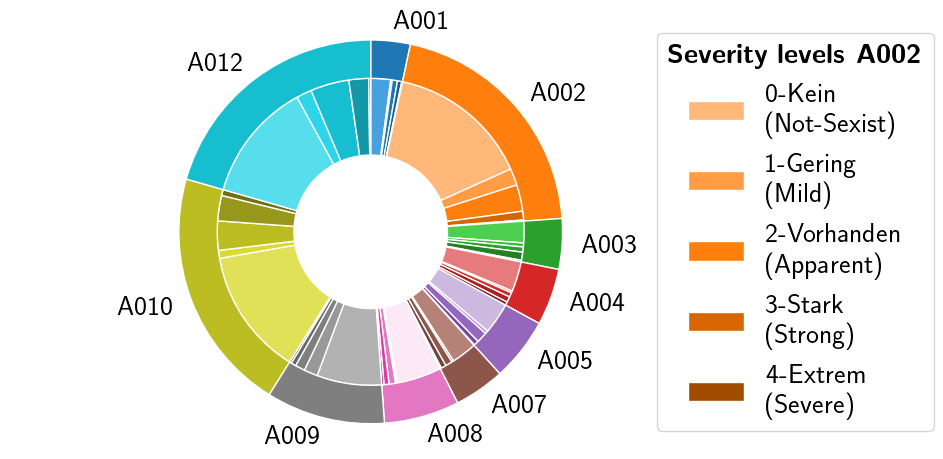

In [3]:
def adjust_lightness(color, amount=0.5):
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], max(0, min(1, amount * c[1])), c[2])


plt.rc('text', usetex=True)
# plot a cake chart for the distribution of annotations
plt.figure(figsize=(10, 5))
# inner_colors = plt.get_cmap('Paired')(np.linspace(0, 1, 5))
outer_colors = plt.get_cmap('tab10')(np.linspace(0, 1, len(users)))
inner_colors = np.array([[adjust_lightness(oc, 1.4 - i / 5)
                          for i in range(5)]
                         for oc in outer_colors]).reshape(-1, 3)
p = plt.pie(np.concatenate([np.bincount(user_ann) for user_ann in all_user_ann]), autopct='', startangle=90,
            counterclock=False, radius=0.8, wedgeprops=dict(width=0.4, edgecolor='w'),
            colors=inner_colors, labeldistance=0.5, pctdistance=0.8)
plt.pie([len(user_ann) for user_ann in all_user_ann], labels=users, autopct='', startangle=90, counterclock=False,
        radius=1, wedgeprops=dict(width=0.2, edgecolor='w'), colors=outer_colors)
plt.legend(p[0][5:10],
           ["0-Kein\n(Not-Sexist)", "1-Gering\n(Mild)", "2-Vorhanden\n(Apparent)", "3-Stark\n(Strong)",
            "4-Extrem\n(Severe)"],
           # loc='right', bbox_to_anchor=(1.3, 0.5), title="\\textbf{Severity levels}\n\\textbf{A002}")
           loc='right', bbox_to_anchor=(1.3, 0.5), title="\\textbf{Severity levels A002}")
plt.axis('equal')
plt.tight_layout()
plt.savefig("user_annotations_pie.svg")
plt.show()

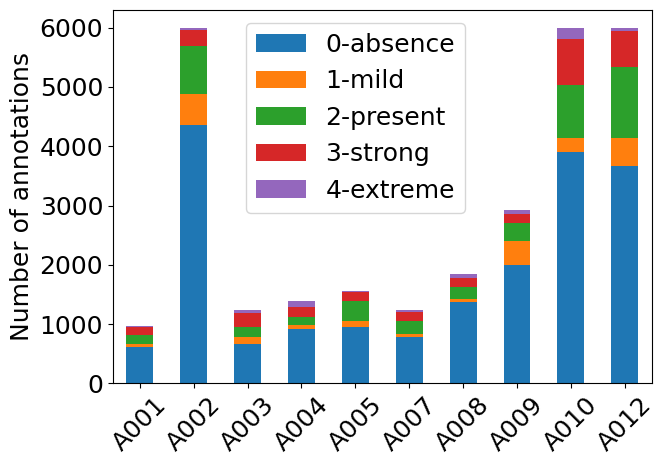

In [4]:
# plot a histogram for the distribution of annotations
plt.rc('text', usetex=False)
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(7, 5))
plt.hist([
    np.concatenate([
        [u] * sum(np.array(ua) == sev)
        for u, ua in zip(users, all_user_ann)
    ])
    for sev in range(5)
], histtype='bar', stacked=True, width=0.5, bins=np.linspace(-0.25, len(users) - 0.25, len(users) + 1),
    # label=["0-Kein\n(Not-Sexist)", "1-Gering\n(Mild)", "2-Vorhanden\n(Apparent)", "3-Stark\n(Strong)", "4-Extrem\n(Severe)"])
    label=["0-absence", "1-mild", "2-present", "3-strong", "4-extreme"])
plt.xticks(range(len(users)), users, rotation=45)
plt.xlim(-0.5, len(users) - 0.5)
plt.ylabel("Number of annotations")
plt.legend(bbox_to_anchor=(0.45, 1.0), loc='upper center')
plt.tight_layout()
plt.savefig("user_annotations_hist.svg")
plt.show()

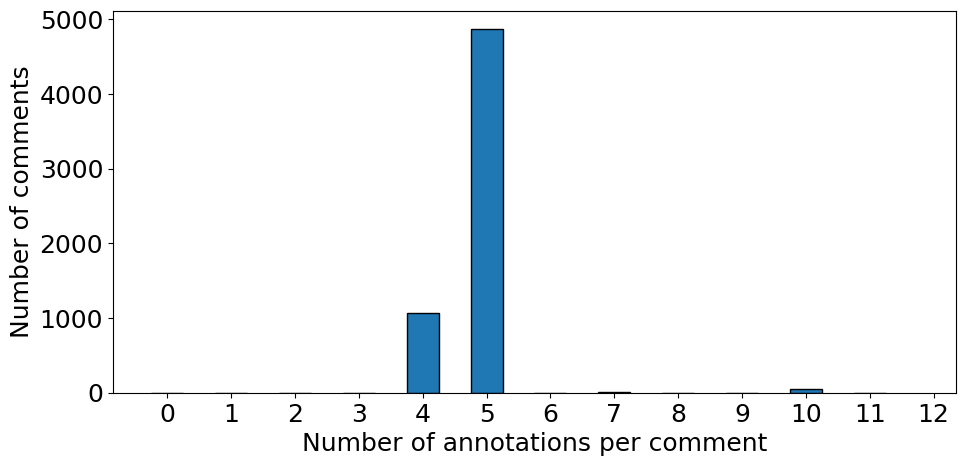

In [5]:
# plot a histogram of the number of annotations per comment
plt.figure(figsize=(10, 5))
plt.hist([len(ann) for ann in train_ann], bins=np.arange(0, 13) - 0.25, histtype='bar', stacked=True, edgecolor='black',
         width=0.5)
plt.xlabel("Number of annotations per comment")
plt.ylabel("Number of comments")
plt.xticks(range(0, 13))
# plt.ylim(0, 10)
plt.tight_layout()
plt.savefig("annotations_per_comment.svg")
plt.show()